In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pandasql as psql
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
#to set attributes such that DataFrame displays all the columns

pd.set_option("display.max_columns",None)

In [4]:
# Load the credit score classification data

crScore = pd.read_csv(r"D:\ml_intern_dataset\creditscoreclassification.csv", header=0)

# Copy to back-up file

crScore_bk = crScore.copy()

# Display first 5 records

crScore.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Exploratory Data Analysis

In [5]:
#displaying the size of the dataset

print(f"The DataSet contains {crScore.shape[0]} records and {crScore.shape[1]} columns")

The DataSet contains 100000 records and 28 columns


In [6]:
crScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
# Identify the no of null values in each feature

null_column_details=crScore.isnull().sum()
print("Feature                 No of null values")
print(null_column_details[null_column_details>0])

Feature                 No of null values
Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64


<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

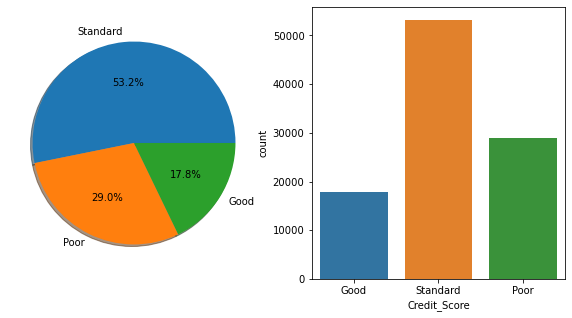

In [8]:
#Analysing the distribution of data in the target variable
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

label=crScore["Credit_Score"].value_counts().index

label_values=crScore["Credit_Score"].value_counts().values

plt.pie(data=crScore,labels=label,x=label_values,autopct="%1.1f%%",shadow=True,radius=1)

plt.subplot(1,2,2)

sns.countplot(x="Credit_Score", data=crScore)

In [9]:
#displaying no of unique values for each feature

crScore.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [10]:
crScore.corr()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
Monthly_Inhand_Salary,1.000000,-0.010819,-0.005049,-0.006422,-0.250100,-0.008867,0.173192,0.007264
Num_Bank_Accounts,-0.010819,1.000000,-0.002216,-0.003998,0.015966,-0.001683,-0.001365,-0.001433
Num_Credit_Card,-0.005049,-0.002216,1.000000,-0.004012,0.008715,-0.003479,-0.003341,0.000768
Interest_Rate,-0.006422,-0.003998,-0.004012,1.000000,0.009792,-0.001681,-0.000359,0.002517
Delay_from_due_date,-0.250100,0.015966,0.008715,0.009792,1.000000,0.011508,-0.063796,-0.003889
Num_Credit_Inquiries,-0.008867,-0.001683,-0.003479,-0.001681,0.011508,1.000000,0.000145,-0.007031
Credit_Utilization_Ratio,0.173192,-0.001365,-0.003341,-0.000359,-0.063796,0.000145,1.000000,0.001389
Total_EMI_per_month,0.007264,-0.001433,0.000768,0.002517,-0.003889,-0.007031,0.001389,1.000000


<AxesSubplot:>

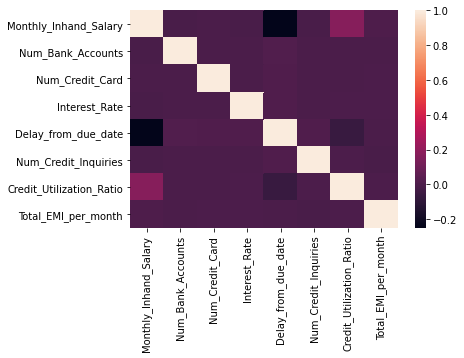

In [11]:
sns.heatmap(crScore.corr())

# Data Preprocessing

In [12]:
#Removing unimportant features
unimportant_features=["ID" , "Customer_ID" , "Name" , "SSN"]

crScore.drop(unimportant_features , axis=1 , inplace=True)

In [13]:
print(crScore.columns)

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [14]:
# Identify the no of null values in each feature

null_column_details=crScore.isnull().sum()
print("Feature                 No of null values")
print(null_column_details[null_column_details>0])

Feature                 No of null values
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64


In [15]:
#Handling missing values in Monthly_Inhand_Salary by replacing them with median value

crScore["Monthly_Inhand_Salary"]=crScore["Monthly_Inhand_Salary"].fillna(crScore["Monthly_Inhand_Salary"].median())

In [16]:
#displaying unique values in Type of Loan feature

crScore["Type_of_Loan"].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [17]:
#Handling missing values in Type_of_Loan by replacing them with mode value

crScore["Type_of_Loan"]=crScore["Type_of_Loan"].fillna(crScore["Type_of_Loan"].mode()[0])

In [18]:
#displaying unique values in Type of Num_of_Delayed_Payment feature

crScore["Num_of_Delayed_Payment"].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [19]:
#We can observe that there are values such as 8_ so we need to remove underscores

crScore["Num_of_Delayed_Payment"]=crScore["Num_of_Delayed_Payment"].str.rstrip("_")

#changing the datatype to float

crScore["Num_of_Delayed_Payment"]=crScore["Num_of_Delayed_Payment"].astype(float)

#Handling missing values in Num_of_Delayed_Payment by replacing them with median value

crScore["Num_of_Delayed_Payment"]=crScore["Num_of_Delayed_Payment"].fillna(crScore["Num_of_Delayed_Payment"].median())

In [20]:
#printing the unique values in the feature Num_Credit_Inquiries

print(crScore["Num_Credit_Inquiries"].unique())

[   4.    2.    3. ... 1361.  310.   74.]


In [21]:
#Handling missing values in Num_Credit_Inquiries by replacing them with median value

crScore["Num_Credit_Inquiries"]=crScore["Num_Credit_Inquiries"].fillna(crScore["Num_Credit_Inquiries"].median())

In [22]:
#printing count of different values in the feature Amount_invested_monthly

print(crScore["Amount_invested_monthly"].value_counts())

__10000__             4305
0.0                    169
245.19352291465958       1
93.3145601541342         1
96.84660523857184        1
                      ... 
65.83261558003073        1
144.11703940738118       1
119.01266256073768       1
500.3330922163558        1
50.517983392874974       1
Name: Amount_invested_monthly, Length: 91049, dtype: int64


In [23]:
# We can observe that Amount_invested_monthly contains values like __10000__ so we need to remove underscores

crScore["Amount_invested_monthly"]=crScore["Amount_invested_monthly"].str.lstrip("__")

crScore["Amount_invested_monthly"]=crScore["Amount_invested_monthly"].str.rstrip("__")

#converting the data type to float

crScore["Amount_invested_monthly"]=crScore["Amount_invested_monthly"].astype(float)

#Handling missing values in Amount_invested_monthly by replacing them with median value

crScore["Amount_invested_monthly"]=crScore["Amount_invested_monthly"].fillna(crScore["Amount_invested_monthly"].median())

In [24]:
#printing count of different values in the feature Monthly_Balance

crScore["Monthly_Balance"].value_counts()

__-333333333333333333333333333__    9
305.14972611646783                  1
1073.4330487842117                  1
484.89289887472376                  1
302.160991311303                    1
                                   ..
198.9246022630669                   1
1022.7368432457347                  1
542.8622071418579                   1
506.94598612813337                  1
580.5854515935114                   1
Name: Monthly_Balance, Length: 98792, dtype: int64

In [25]:
# We can observe that it contain values precedded and succedded by '__'

#so we remove them

crScore["Monthly_Balance"]=crScore["Monthly_Balance"].str.lstrip("__")

crScore["Monthly_Balance"]=crScore["Monthly_Balance"].str.rstrip("__")

#converting the datatype to float

crScore["Monthly_Balance"]=crScore["Monthly_Balance"].astype(float)

#Handling missing values in Monthly_Balance by replacing them with median value

crScore["Monthly_Balance"]=crScore["Monthly_Balance"].fillna(crScore["Monthly_Balance"].median())

In [26]:
#printing count of different values in the feature Credit_History_Age

print(crScore["Credit_History_Age"].value_counts())

15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64


In [27]:
#It is having the features such as 19 Years and 3 Months so we will convert it into 19.25

#splitting the value based on ' and '

crScore[['Credit_Hist_yr', 'Credit_Hist_mnt']]=crScore["Credit_History_Age"].str.split(pat=' and ',expand=True)

In [28]:
#Removing the values such as years and months

crScore["Credit_Hist_yr"]=crScore["Credit_Hist_yr"].str.rstrip(" Years")

crScore["Credit_Hist_mnt"]=crScore["Credit_Hist_mnt"].str.rstrip(" Months")

#converting them to float

crScore["Credit_Hist_yr"]=crScore["Credit_Hist_yr"].astype(float)

crScore["Credit_Hist_mnt"]=crScore["Credit_Hist_mnt"].astype(float)

#combining the two features as our requirement

crScore["Credit_History_Age"]=crScore["Credit_Hist_yr"] + (crScore["Credit_Hist_yr"]/12)

#dropping the unwanted features

unwanted_features=["Credit_Hist_yr" , "Credit_Hist_mnt"]

crScore.drop(unwanted_features,axis=1,inplace=True)

#filling the null values with median value

crScore["Credit_History_Age"]=crScore["Credit_History_Age"].fillna(crScore["Credit_History_Age"].median())

In [29]:
#Checking if any of the features have null values

crScore.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [30]:
crScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      100000 non-null  fl

In [31]:
crScore["Month"].value_counts()

March       12500
June        12500
August      12500
February    12500
May         12500
July        12500
January     12500
April       12500
Name: Month, dtype: int64

In [32]:
crScore["Age"].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [33]:
#we can observe that age contains values precceded and succeded by '_'
 
#Removing underscores 

crScore["Age"]=crScore["Age"].str.lstrip("_")

crScore["Age"]=crScore["Age"].str.rstrip("_")

#converting the data type to int

crScore["Age"]=crScore["Age"].astype(int)

In [34]:
crScore["Occupation"].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [35]:
crScore["Annual_Income"].unique()

#we can observe that age contains values precceded and succeded by '_'

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [36]:
#Removing underscores 

crScore["Annual_Income"]=crScore["Annual_Income"].str.lstrip("_")

crScore["Annual_Income"]=crScore["Annual_Income"].str.rstrip("_")

#converting the data type to int

crScore["Annual_Income"]=crScore["Annual_Income"].astype(float)

crScore["Annual_Income"].unique()

array([ 19114.12,  34847.84, 143162.64, ...,  37188.1 ,  20002.88,
        39628.99])

In [37]:
crScore["Num_of_Loan"].unique()

#we can observe that age contains values precceded and succeded by '_'

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [38]:
#Removing underscores 

crScore["Num_of_Loan"]=crScore["Num_of_Loan"].str.lstrip("_")

crScore["Num_of_Loan"]=crScore["Num_of_Loan"].str.rstrip("_")

#converting the data type to int

crScore["Num_of_Loan"]=crScore["Num_of_Loan"].astype(int)

In [39]:
crScore["Changed_Credit_Limit"].value_counts()

_                      2091
8.22                    133
11.5                    127
11.32                   126
10.06                   121
                       ... 
-2.1100000000000003       1
-5.25                     1
-4.69                     1
25.78                     1
35.84                     1
Name: Changed_Credit_Limit, Length: 4384, dtype: int64

In [40]:
crScore["Changed_Credit_Limit"]=crScore["Changed_Credit_Limit"].str.replace("_","0")

crScore['Changed_Credit_Limit']=crScore['Changed_Credit_Limit'].astype('float')

In [41]:
crScore["Outstanding_Debt"].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [42]:
crScore['Outstanding_Debt'] = crScore['Outstanding_Debt'].str.rstrip('_')
crScore['Outstanding_Debt'] = crScore['Outstanding_Debt'].str.lstrip('_')
crScore['Outstanding_Debt']=crScore['Outstanding_Debt'].astype('float')

In [43]:
crScore["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [44]:
crScore["Payment_Behaviour"] = crScore["Payment_Behaviour"].replace({'!@9#%8':"NM", '#F%$D@*&8':"NM"})

In [45]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
columns=["Month","Occupation","Type_of_Loan","Payment_of_Min_Amount","Payment_Behaviour","Credit_Score","Credit_Mix"]
for i in columns:
    crScore[i]=LE.fit_transform(crScore[i])

In [46]:
crScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  int32  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Type_of_Loan              100000 non-null  int32  
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [47]:
IndepVar = []
for col in crScore.columns:
    if col != 'Credit_Score':
        IndepVar.append(col) 
TargetVar = 'Credit_Score'
x = crScore[IndepVar]
y = crScore[TargetVar]

In [48]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [49]:
#identifing the features which are needed to be normalised

mm_cols=["Age","Annual_Income","Monthly_Inhand_Salary","Num_Bank_Accounts","Num_Credit_Card","Interest_Rate","Num_of_Loan","Delay_from_due_date","Num_of_Delayed_Payment","Changed_Credit_Limit","Num_Credit_Inquiries","Outstanding_Debt","Credit_Utilization_Ratio","Credit_History_Age","Total_EMI_per_month","Amount_invested_monthly","Monthly_Balance"]

In [50]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[mm_cols] = mmscaler.fit_transform(x_train[mm_cols])
x_train = pd.DataFrame(x_train)

x_test[mm_cols] = mmscaler.fit_transform(x_test[mm_cols])
x_test = pd.DataFrame(x_test)

In [51]:
# Load the result dataset
EMResults = pd.read_csv(r"D:\internship\HTResults.csv", header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression(multi_class='multinomial', penalty='none', random_state=42,
                   solver='newton-cg')
[[ 1712   345  1243]
 [   71  3766  2037]
 [ 3539  4694 12593]]
Print Class: 0
TP=1712, FN=1588, TN=23090, FP=3610
Accuracy: 0.827
Precision: 0.322
Sensitivity: 0.519
F1-Score: 0.397
Specificity: 0.865
Balanced Accuracy: 0.692
MCC: 0.314

Print Class: 1
TP=3766, FN=2108, TN=19087, FP=5039
Accuracy: 0.762
Precision: 0.428
Sensitivity: 0.641
F1-Score: 0.513
Specificity: 0.791
Balanced Accuracy: 0.716
MCC: 0.377

Print Class: 2
TP=12593, FN=8233, TN=5894, FP=3280
Accuracy: 0.616
Precision: 0.793
Sensitivity: 0.605
F1-Score: 0.686
Specificity: 0.642
Balanced Accuracy: 0.624
MCC: 0.228

Overall Performance Prediction:
Accuracy: 73.5%
Precision: 51.4333%
Recall or Sensitivity: 58.8333%
F1-Score: 0.532
Specificity or True Nagative Rate: 76.6%
Balanced Accuracy: 67.7333%

MCC: 0.3063

roc_auc_score: 0.763
Model Name:  DecisionTreeClassifier()
[[ 3022   377  1973]
 

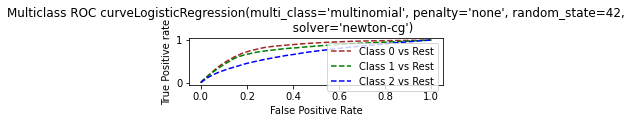

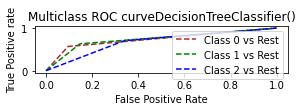

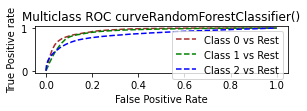

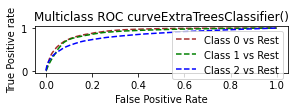

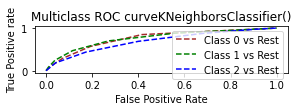

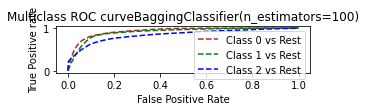

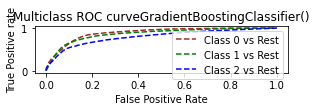

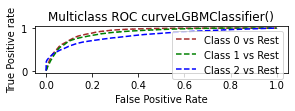

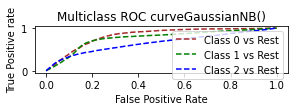

In [52]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Build the Calssification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
# Create objects of classification algorithm with default hyper-parameters
ModelLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=42)
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

# Evalution matrix for all the algorithms

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, modelBAG,ModelGB, ModelLGB, modelGNB]
counter=1
for models in MM:
    overall_tp=0
    overall_fn=0
    overall_fp=0
    overall_tn=0
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import multilabel_confusion_matrix
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from math import sqrt

    print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

    # Actual and predicted classes

    lst_actual_class = y_test
    lst_predicted_class = y_pred
    lst_predicted_prob_class = y_pred_prob

    # Class = Label 0-2

    lst_classes = [0, 1, 2]

    # Compute multi-class confusion matrix

    arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

    # Temp store results

    model_acc = [];
    model_recall = [];
    model_prec = [];
    model_fscore = [];
    model_spec = [];
    model_bal_acc = [];
    model_mcc = [];
    for no_class in range(len(lst_classes)):
        arr_data = arr_out_matrix[no_class];
        print("Print Class: {0}".format(no_class));

        tp = arr_data[1][1]
        fn = arr_data[0][1]
        tn = arr_data[0][0]
        fp = arr_data[1][0]
        
        overall_tp+=tp
        overall_fn+=fn
        overall_fp+=fp
        overall_tn+=tn

        sensitivity = round(tp/(tp+fn), 3);
        specificity = round(tn/(tn+fp), 3);
        accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
        balanced_accuracy = round((sensitivity+specificity)/2, 3);

        precision = round(tp/(tp+fp), 3);
        f1Score = round((2*tp/(2*tp + fp + fn)), 3);

        mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
        MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
        model_acc.append(accuracy);
        model_prec.append(precision);
        model_recall.append(sensitivity);
        model_fscore.append(f1Score);
        model_spec.append(specificity);
        model_bal_acc.append(balanced_accuracy);
        model_mcc.append(MCC);
        
        print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
        print("Accuracy: {0}".format(accuracy));    # Accuracy score
        print("Precision: {0}".format(precision)); # Precision score
        print("Sensitivity: {0}".format(sensitivity)); # Recall score
        print("F1-Score: {0}".format(f1Score)); # F1 score
        print("Specificity: {0}".format(specificity)); # True Nagative Rate
        print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
        print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

    # OVERALL - FINAL PREDICTION PERFORMANCE

    # importing mean()

    from statistics import mean
    import math
    
    accuracy=round(mean(model_acc)*100, 4)
    precision=round(mean(model_prec)*100, 4)
    sensitivity=round(mean(model_recall)*100, 4)
    f1Score=round(mean(model_fscore), 4)
    specificity=round(mean(model_spec)*100, 4)
    balanced_accuracy=round(mean(model_bal_acc)*100, 4)
    MCC=round(mean(model_mcc), 4)
    print("Overall Performance Prediction:");
    print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
    print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
    print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
    print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
    print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
    print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
    print("MCC: {0}\n".format(round(mean(model_mcc), 4)))
    
    overall_tp=overall_tp/3
    overall_fn=overall_fn/3
    overall_tn=overall_tn/3
    overall_fp=overall_fp/3
    
    overall_tp=round(overall_tp)
    overall_tn=round(overall_tn)
    overall_fp=round(overall_fp)
    overall_fn=round(overall_fn)
    
    
    fpr = {}
    tpr = {}
    thresh ={}

    n_class = 3

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)

    # plotting    
    plt.figure(figsize=(10,5))
    plt.subplot(5,2,counter)
    plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
    
    my_title="Multiclass ROC curve" + str(models)
    plt.title(my_title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')

    # ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
    # all other classes. 

    print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                                average='weighted'),3))
    
    counter=counter+1
    
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': overall_tp,
               'False_Negative': overall_fn, 
               'False_Positive': overall_fp, 
               'True_Negative': overall_tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score':round(roc_auc_score(y_test, y_pred_prob, multi_class='ovo', average='weighted'),3),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [53]:
EMResults.head(20)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"LogisticRegression(multi_class='multinomial', ...",6024,3976,3976,16024,73.5000,51.4333,58.8333,0.5320,76.6000,0.3063,0.763,67.7333
1,DecisionTreeClassifier(),6582,3418,3418,16582,77.2000,63.4000,63.4333,0.6340,80.6333,0.4403,0.719,72.0333
2,"(DecisionTreeClassifier(max_features='auto', r...",7760,2240,2240,17760,85.0667,76.1000,76.1667,0.7613,87.2333,0.6337,0.899,81.6667
3,"(ExtraTreeClassifier(random_state=716310161), ...",7439,2561,2561,17439,82.9333,72.4000,72.5333,0.7240,85.5000,0.5790,0.879,79.0333
4,KNeighborsClassifier(),5936,4064,4064,15936,72.9000,54.7000,55.1667,0.5487,77.2333,0.3207,0.737,66.2333
5,(DecisionTreeClassifier(random_state=306361428...,7668,2332,2332,17668,84.4667,75.2667,75.2333,0.7523,86.7333,0.6197,0.891,81.0000
6,([DecisionTreeRegressor(criterion='friedman_ms...,6989,3011,3011,16989,79.9333,66.8333,68.0667,0.6730,82.9000,0.5013,0.847,75.5000
7,LGBMClassifier(),7233,2767,2767,17233,81.5667,70.7667,70.4000,0.7047,84.3333,0.5487,0.875,77.4000
8,GaussianNB(),5706,4294,4294,15706,71.3667,61.6333,56.8667,0.5670,77.9000,0.3697,0.747,67.3667


In [55]:
EMResults.to_csv("D://Intern_CreditScoreclassification_results.csv")